In [20]:
from math import ceil
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import scipy.stats as stats

from glm.glm import GLM
from glm.families import Gaussian, Bernoulli, Poisson, Gamma

import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

## Linear regression

In [21]:
def linear_model_summary(model, name=None):
    """Print a small and efficient summary of a linear model object."""
    if not name:
        name = "Linear"
    variable_names = model.params.index
    parameter_estimates = model.params
    standard_errors = model.bse
    header_string = "{:<10} {:>20} {:>15}".format("Name", "Parameter Estimate", "Standard Error")
    print("{} Model Summary".format(name).center(len(header_string)))
    print('='*len(header_string))
    print(header_string)
    print('-'*len(header_string))
    format_string = "{:<20} {:>10.2f} {:>15.2f}"
    for name, est, se in zip(variable_names, parameter_estimates, standard_errors):
        print(format_string.format(name, est, se))

In [22]:
lin_df = pd.read_csv('../data/ddf_final_without_scores.csv')
numeric_predictors = ['elo', 'opp_elo', 'diff', 'color',
                      'game_time', 'start_time', 'weekday', 'day']
X = lin_df[numeric_predictors]
y = np.array(lin_df['result'])

In [23]:
cols = lin_df.columns

Text(0.5, 1.0, 'Winning at different Elo')

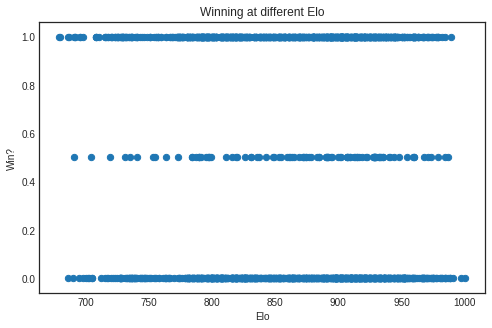

In [24]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.scatter(lin_df.elo, lin_df.result, s=40)
ax.set_xlabel("Elo")
ax.set_ylabel("Win?")
ax.set_title("Winning at different Elo")

In [25]:
color_boolean = lin_df.color.astype(bool)

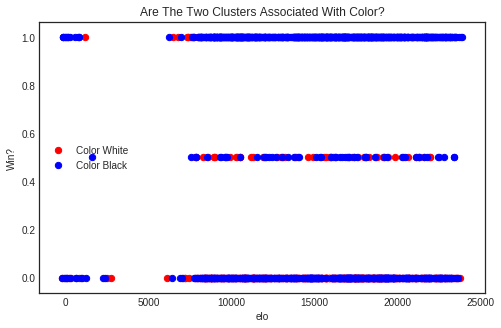

In [26]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(lin_df.start_time[color_boolean], 
           lin_df.result[color_boolean], 
           s=40, c="red", label="Color White")
ax.scatter(lin_df.start_time[~color_boolean], 
           lin_df.result[~color_boolean],
           s=40, c="blue", label="Color Black")
ax.set_xlabel("elo")
ax.set_ylabel("Win?")
ax.set_title("Are The Two Clusters Associated With Color?")
ax.legend()


In [27]:
lm = LinearRegression()

In [28]:
lm.fit(X,y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
lm.intercept_

array([0.80776137])

In [30]:
lm.coef_

array([[ 3.31424922e-04, -7.04732128e-04,  1.03615705e-03,
         6.70542631e-02,  7.39859891e-05, -2.93919360e-06,
        -2.48166210e-04, -5.84688916e-05]])

In [31]:
lm.predict(np.array(X.loc[505]).reshape(1,-1))

array([[0.39531984]])

In [32]:
cdf.result.loc[505]

NameError: name 'cdf' is not defined

## Logistic Regression

In [33]:
log_df = pd.read_csv('../data/ddf_final_without_scores.csv')
log_df = log_df[log_df['result']!=0.5]
numeric_predictors = ['elo', 'opp_elo', 'diff', 'color',
                      'game_time', 'start_time', 'weekday', 'day']
X = log_df[numeric_predictors]
y = log_df['result']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [35]:
lor = LogisticRegression()

In [36]:
lor.fit(X_train, y_train)

/home/guess/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
lor.predict(X_test)

array([0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 0.

In [38]:
lor.coef_

array([[ 5.75933393e-03, -6.52279999e-03,  1.22821339e-02,
         3.85905699e-01,  8.13905885e-04, -3.87963121e-06,
        -1.79132786e-02,  5.35750413e-03]])

In [39]:
lor.intercept_

array([0.04466601])

In [40]:
lor.score(X_test, y_test)

0.7206405693950177

In [41]:
lor.predict_proba(X_test)

array([[0.5310465 , 0.4689535 ],
       [0.12478904, 0.87521096],
       [0.68822641, 0.31177359],
       ...,
       [0.49408225, 0.50591775],
       [0.35175768, 0.64824232],
       [0.43623503, 0.56376497]])